In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df.shape

(200, 5)

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
df.duplicated().sum()

0

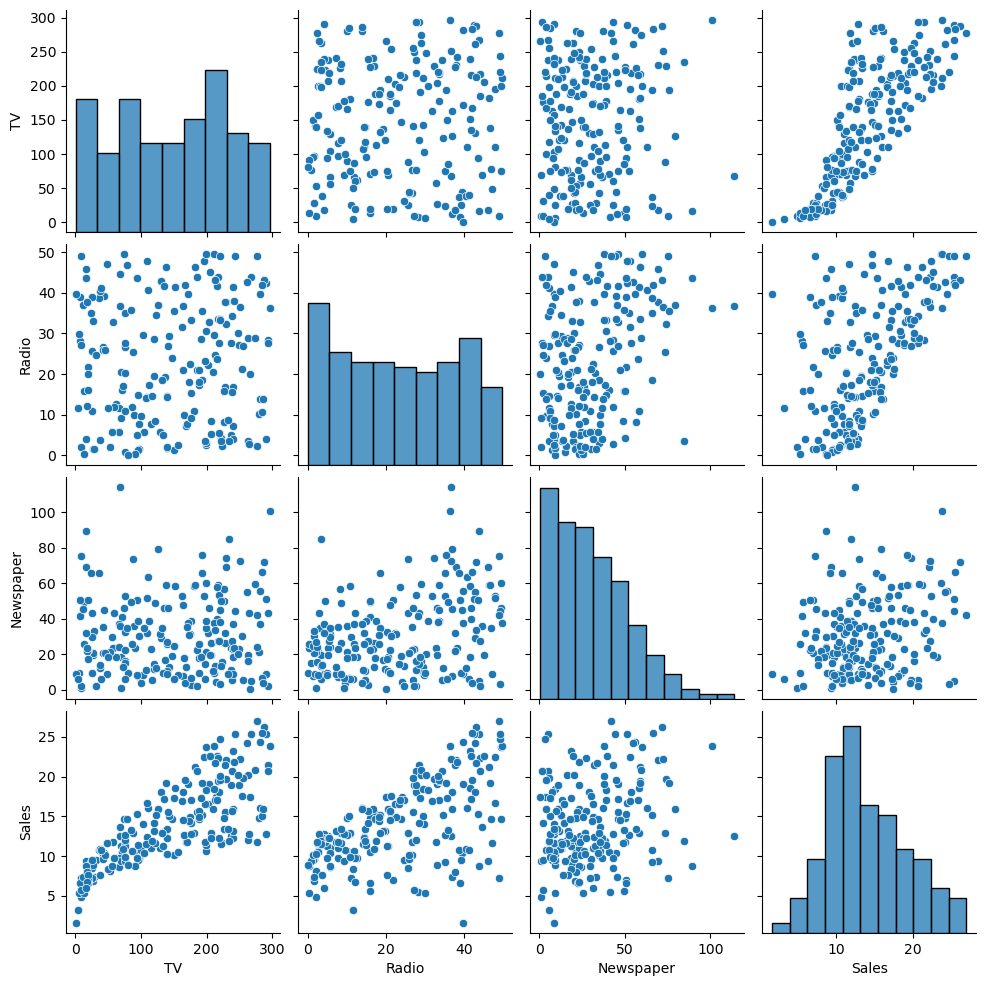

In [17]:
sns.pairplot(df)

In [18]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


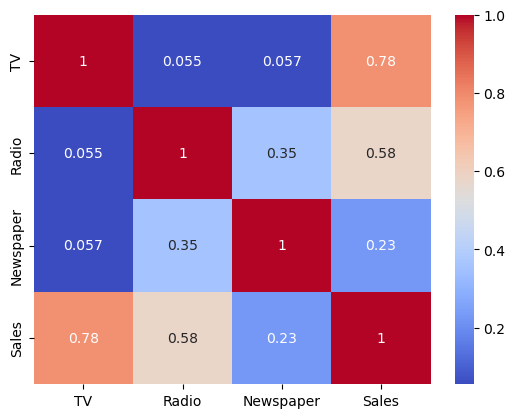

In [19]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

_____

## Outliers analysis

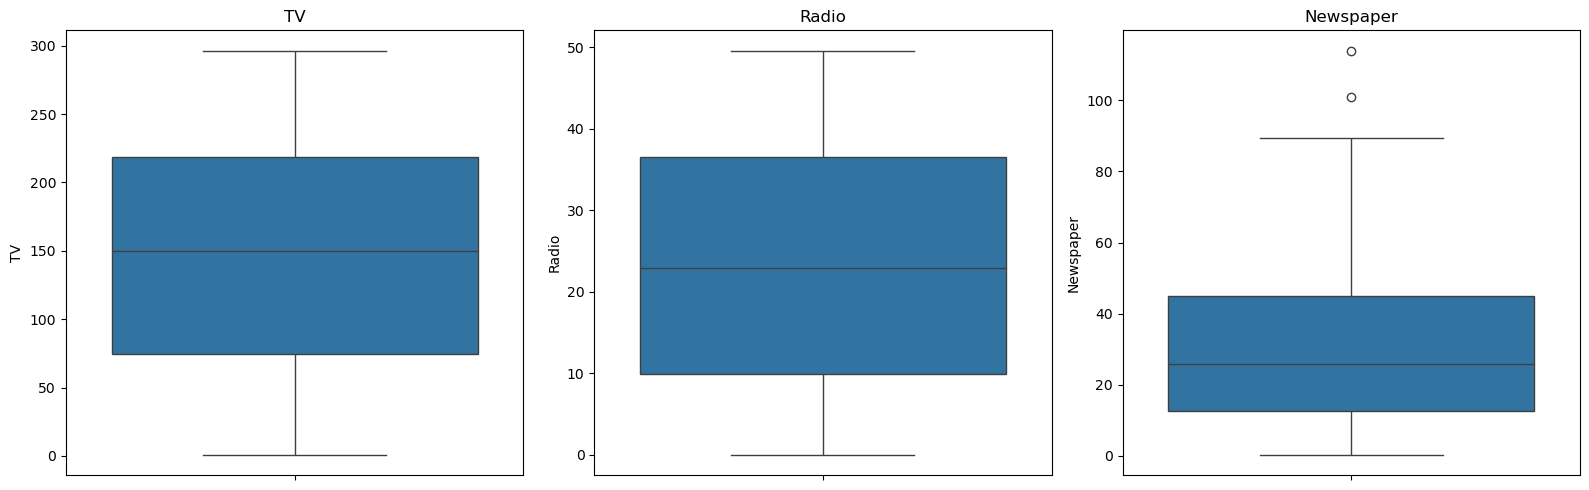

In [24]:


fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.boxplot(data=df, y='TV', ax=axes[0])
axes[0].set_title('TV')

sns.boxplot(data=df, y='Radio', ax=axes[1])
axes[1].set_title('Radio')

sns.boxplot(data=df, y='Newspaper', ax=axes[2])
axes[2].set_title('Newspaper')

plt.tight_layout()
plt.show()


In [27]:
#this becomes outliers data frames with respect to other columns
Q1=np.percentile(df['Newspaper'],25)
Q2=np.percentile(df['Newspaper'],50)
Q3=np.percentile(df['Newspaper'],75)
med=df['Newspaper'].median()
#calc IQR
IQR=Q3-Q1
#calc outliers
UB= Q3+1.5*IQR
LB= Q1-1.5*IQR
c1=df['Newspaper']<LB
c2=df['Newspaper']>UB
outliers=df[c1|c2]
outliers

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [29]:
df['Newspaper']=np.where(
    c1 | c2,         
    med,             
    df['Newspaper']  
)

In [31]:
Q1=np.percentile(df['Newspaper'],25)
Q2=np.percentile(df['Newspaper'],50)
Q3=np.percentile(df['Newspaper'],75)
med=df['Newspaper'].median()
#calc IQR
IQR=Q3-Q1
#calc outliers
UB= Q3+1.5*IQR
LB= Q1-1.5*IQR
c1=df['Newspaper']<LB
c2=df['Newspaper']>UB
outliers=df[c1|c2]
outliers

,TV,Radio,Newspaper,Sales


<Axes: ylabel='Newspaper'>

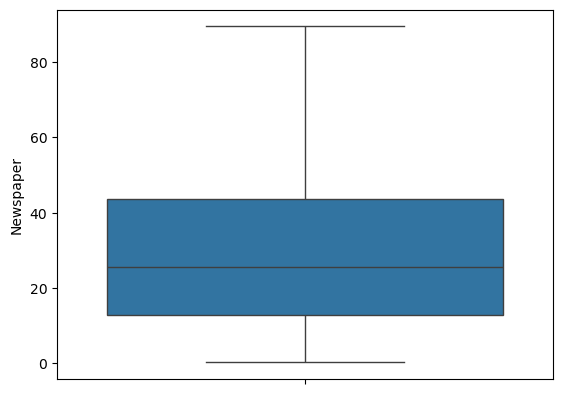

In [33]:
sns.boxplot(data=df, y='Newspaper')

____________________________

## Normalizing the data

In [37]:
df['TV']=SC.fit_transform(df[['TV']])
df['Radio']=SC.fit_transform(df[['Radio']])
df['Newspaper']=SC.fit_transform(df[['Newspaper']])
df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.944341,22.1
1,-1.197376,1.082808,0.756935,10.4
2,-1.516155,1.528463,1.949268,9.3
3,0.052050,1.217855,1.417153,18.5
4,0.394182,-0.841614,1.412226,12.9


In [39]:
df['TV']=SC.fit_transform(df[['TV']])
df['Radio']=SC.fit_transform(df[['Radio']])
df['Newspaper']=SC.fit_transform(df[['Newspaper']])
df.head()

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.944341,22.1
1,-1.197376,1.082808,0.756935,10.4
2,-1.516155,1.528463,1.949268,9.3
3,0.052050,1.217855,1.417153,18.5
4,0.394182,-0.841614,1.412226,12.9


____________________

## Splitting the data

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
X=df.drop('Sales',axis=1)
y=df['Sales']

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 3), (40, 3), (160,), (40,))

_________________

## Model Building linear regression

In [78]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [80]:
LR.fit(X_train,y_train)

LinearRegression()

In [82]:
y_pred=LR.predict(X_test)

________________

## Model Evaluation Linear regression

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [61]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('mae',mae)
print('mse',mse)
print('rmse',rmse)
print('r2',r2)

mae 1.2389242380929606
mse 2.9253440567807543
rmse 1.7103637206105473
r2 0.9067414329595751


In [84]:
data=pd.DataFrame({'Actual_sales':y_test,'Predicted_sales':y_pred,'diff':y_test-y_pred})
data.head()

,Actual_sales,Predicted_sales,diff
197,12.8,12.680012,0.119988
157,10.1,9.987776,0.112224
31,11.9,11.394769,0.505231
48,14.8,16.341113,-1.541113
63,14.0,13.134607,0.865393


Text(0.5, 1.0, 'Actual sales vs predicted sales - Linear regression')

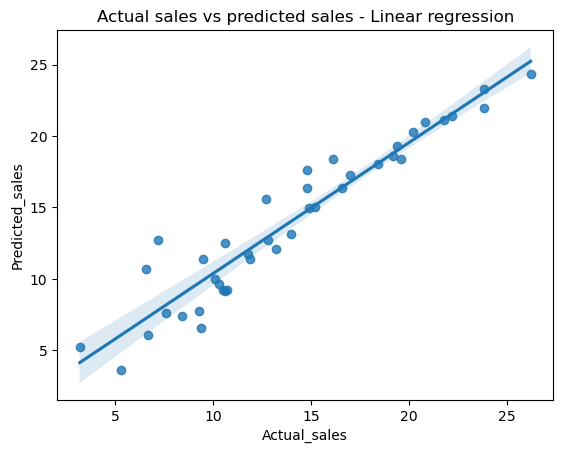

In [88]:

sns.regplot(x=data['Actual_sales'],y=data['Predicted_sales'])
plt.title('Actual sales vs predicted sales - Linear regression')

__________

## Model bulding Random forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()

In [97]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [99]:
y_pred=RF.predict(X_test)

## Model evaluation Random forest

In [104]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('mae',mae)
print('mse',mse)
print('rmse',rmse)
print('r2',r2)

mae 0.6384999999999978
mse 0.5970695999999978
rmse 0.7727027889169275
r2 0.9809657071993523


In [106]:
data=pd.DataFrame({'Actual_sales':y_test,'Predicted_sales':y_pred,'diff':y_test-y_pred})
data.head()

,Actual_sales,Predicted_sales,diff
197,12.8,13.075,-0.275
157,10.1,10.716,-0.616
31,11.9,12.569,-0.669
48,14.8,15.528,-0.728
63,14.0,12.555,1.445


Text(0.5, 1.0, 'Actual sales vs predicted sales - Random Forest')

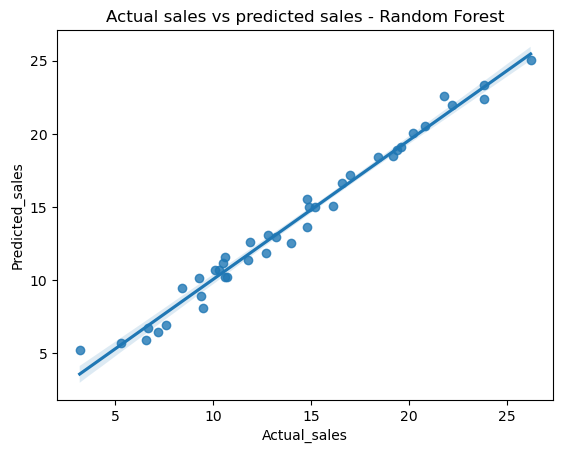

In [108]:
sns.regplot(x=data['Actual_sales'],y=data['Predicted_sales'])
plt.title('Actual sales vs predicted sales - Random Forest')